# 회귀분석 예제
# usedcar2

In [1]:
import numpy as np
import pandas as pd

In [2]:
usedcar = pd.read_csv('usedcar.csv')

In [3]:
usedcar.head()

,Price,Odometer,Color
0,14636,37388,white
1,14122,44758,white
2,14470,45854,white
3,15072,40149,white
4,14802,40237,white


In [4]:
usedcar.describe()

,Price,Odometer
count,100.000000,100.000000
mean,14822.820000,36009.450000
std,509.897601,6597.627578
min,13574.000000,19057.000000
25%,14449.500000,32136.500000
50%,14724.000000,36210.500000
75%,15195.000000,40290.750000
max,15822.000000,49223.000000


## Mean Values for Each Color

In [5]:
np.mean(usedcar['Price'])

14822.82

In [6]:
usedcar.groupby('Color').mean()[['Price']]

,Price
Color,
other,14618.969697
silver,15220.200000
white,14682.432432


## Indicator Variables

In [7]:
usedcar['Color'] = usedcar['Color'].astype('category')
usedcar['Color'].cat.categories

Index(['other', 'silver', 'white'], dtype='object')

In [8]:
usedcar['Color'].cat.reorder_categories(['other', 'white', 'silver'], inplace=True)
usedcar['Color'].cat.categories

Index(['other', 'white', 'silver'], dtype='object')

In [9]:
usedcar_dum = pd.get_dummies(usedcar, columns=['Color'], drop_first=True)

In [10]:
usedcar_dum.head(5)

,Price,Odometer,Color_white,Color_silver
0,14636,37388,1,0
1,14122,44758,1,0
2,14470,45854,1,0
3,15072,40149,1,0
4,14802,40237,1,0


In [11]:
usedcar_dum.tail(3)

,Price,Odometer,Color_white,Color_silver
97,14296,42581,0,0
98,15050,31372,0,0
99,14848,36238,0,0


## Regression Fitting

In [12]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [13]:
model = smf.ols(formula='Price ~ Odometer + Color_white + Color_silver', data=usedcar_dum)
results = model.fit()

In [ ]:
results.summary()

In [ ]:
round(results.params, 4)

## Mean Odometer for Each Color

In [ ]:
usedcar.groupby('Color').mean()[['Odometer']]

## Plotting

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
color_dict = dict({'silver':'black', 'white':'blue', 'other': 'red'})
sns.relplot(x='Odometer', y='Price', data=usedcar, hue='Color', palette=color_dict, aspect=1.5)
plt.plot([19000, 49300], [16700.6-0.0555*x for x in [19000, 49300]], linestyle='dotted', c='black')
plt.plot([19000, 49300], [16791.1-0.0555*x for x in [19000, 49300]], linestyle='dashed', c='black')
plt.plot([19000, 49300], [16996.1-0.0555*x for x in [19000, 49300]], linestyle='solid', c='black')
plt.text(30000, 14500, 'y=16700.6-0.0555*x', size=12)
plt.text(36500, 14700, 'y=16700.6-0.0555*x', size=12)
plt.text(28000, 15400, 'y=16700.6-0.0555*x', size=12)
plt.show()

## Trellis Plot

In [ ]:
sns.lmplot(x='Odometer', y='Price', data=usedcar, col='Color',
           line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, aspect=0.7)
plt.show()

## Regression Diagnostics

In [ ]:
sm.qqplot(results.resid, fit=True, line='45')
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
eqvar = pd.DataFrame({'fitted': results.fittedvalues, 'resid' : results.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)
plt.title("Equal Variance Check")
plt.xlabel("Fitted values")
plt.ylabel("Residual")
plt.show()

## Stepwise

In [ ]:
import feature_selection as fsel

X = usedcar_dum.drop(['Price'], axis=1)
y = usedcar_dum['Price']

In [ ]:
fsel.backwardSelection(X, y, model_type='linear', elimination_criteria='aic')

In [ ]:
color_dict = dict({'silver':'black', 'white':'red', 'other': 'red'})
sns.relplot(x='Odometer', y='Price', data=usedcar, hue='Color', palette=color_dict, aspect=1.5)
plt.plot([19000, 49300], [16740-0.0553*x for x in [19000, 49300]], linestyle='solid', c='black')
plt.plot([19000, 49300], [16988.9-0.0553*x for x in [19000, 49300]], linestyle='dotted', c='black')
plt.text(27000, 14500, 'y=16740-0.0553*x', size=12)
plt.text(35000, 15200, 'y=16988.9-0.0553*x', size=12)
plt.show()

## Interaction Model

In [ ]:
formula ='Price ~ Odometer+Color_silver+Color_white+Odometer:Color_silver+Odometer:Color_white'
model = smf.ols(formula=formula, data=usedcar_dum)
results = model.fit()
results.summary()

In [ ]:
X = usedcar_dum.drop(['Price'], axis=1)
y = usedcar_dum['Price']

In [ ]:
X['Odometer:Color_white'] = X['Odometer']*X['Color_white']
X['Odometer:Color_silver'] = X['Odometer']*X['Color_silver']

In [ ]:
fsel.backwardSelection(X, y, model_type='linear', elimination_criteria='aic')

In [ ]:
formula ='Price ~ Odometer+Color_white+Odometer:Color_silver+Odometer:Color_white'
model = smf.ols(formula=formula, data=usedcar_dum)
results = model.fit()
round(results.params, 4)

In [ ]:
color_dict = dict({'silver':'black', 'white':'red', 'other': 'green'})
sns.relplot(x='Odometer', y='Price', data=usedcar, hue='Color', palette=color_dict, aspect=1.5)
plt.plot([19000, 49300], [17064.9-0.0653*x for x in [19000, 49300]], linestyle='dotted', c='black')
plt.plot([19000, 49300], [16263.7-0.0417*x for x in [19000, 49300]], linestyle='dashed', c='black')
plt.plot([19000, 49300], [17060-0.0577*x for x in [19000, 49300]], linestyle='solid', c='black')
plt.text(37000, 14000, 'y=17064.9-0.0653*x', size=12)
plt.text(20000, 14900, 'y=16263.7-0.0417*x', size=12)
plt.text(35000, 15200, 'y=17064.9-0.0577*x', size=12)
plt.show()

## Regression Diagnostics

In [ ]:
sm.qqplot(results.resid, fit=True, line='45')
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
eqvar = pd.DataFrame({'fitted': results.fittedvalues, 'resid' : results.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)
plt.title("Equal Variance Check")
plt.xlabel("Fitted values")
plt.ylabel("Residual")
plt.show()

# Model Evaluation for Regression

In [ ]:
usedcar = pd.read_csv('usedcar.csv')
usedcar_dum = pd.get_dummies(usedcar, columns=['Color'], drop_first=True)

## Training and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(usedcar_dum, test_size=0.3, random_state=0)
print('train:', len(train), '| test:', len(test))

## Several Models

In [ ]:
model1 = smf.ols(formula='Price ~ Odometer + Color_silver + Color_white', data=train)
result1 = model1.fit()

In [ ]:
model2 = smf.ols(formula='Price ~ Odometer + Color_silver + Color_white + Color_silver:Odometer + Color_white:Odometer',
                 data=train)
result2 = model2.fit()

In [ ]:
X_train = train.drop(['Price'], axis=1)
y_train = train['Price']
X_train['Color_silver:Odometer'] = X_train['Color_silver']*X_train['Odometer']
X_train['Color_white:Odometer'] = X_train['Color_white']*X_train['Odometer']

In [ ]:
fsel.backwardSelection(X_train, y_train, model_type='linear', elimination_criteria='aic')

In [ ]:
model3 = smf.ols(formula='Price ~ Odometer + Color_silver + Color_white + Color_white:Odometer', data=train)
result3 = model3.fit()

In [ ]:
result1.summary()

In [ ]:
result2.summary()

In [ ]:
result3.summary()

## Predicted Values

In [ ]:
X_test = test.drop(['Price'], axis=1)
y_test = test['Price']
X_test['Color_silver:Odometer'] = X_test['Color_silver']*X_test['Odometer']
X_test['Color_white:Odometer'] = X_test['Color_white']*X_test['Odometer']

In [ ]:
pred1 = result1.predict(X_test)
pred2 = result2.predict(X_test)
pred3 = result3.predict(X_test)

## Predictive $R^2$

In [ ]:
from sklearn.metrics import r2_score as r2
print('model1:',r2(y_test, pred1))
print('model2:',r2(y_test, pred2))
print('model3:',r2(y_test, pred3))

## MAE

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
print('model1:',mae(y_test, pred1))
print('model2:',mae(y_test, pred2))
print('model3:',mae(y_test, pred3))

## MAPE

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
print('model1:',mape(y_test, pred1))
print('model2:',mape(y_test, pred2))
print('model3:',mape(y_test, pred3))

## MSE

In [ ]:
from sklearn.metrics import mean_squared_error as mse
print('model1:',mse(y_test, pred1))
print('model2:',mse(y_test, pred2))
print('model3:',mse(y_test, pred3))

# 회귀분석 프로젝트 예제
# insurance.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- y: charges (보험료)
- x: 나머지 (sex, smoker,region - 범주형)

In [3]:
insurance.describe() # 범주형 변수는 describe X

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
insurance_dum = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'], drop_first=True)
insurance_dum

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


## Plotting - EDA

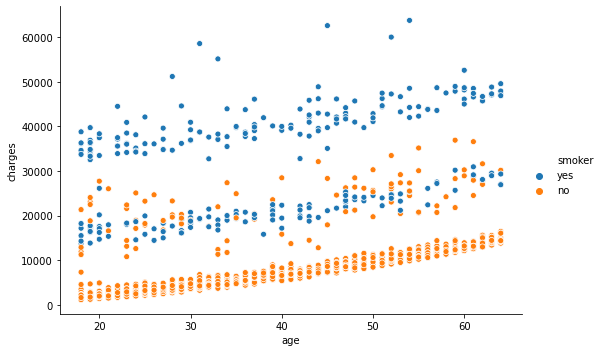

In [5]:
sns.relplot(x='age', y='charges', data=insurance, hue='smoker', aspect=1.5)
# hue: 색상 구분 기준
# aspect: 가로:세로=1.5:1
plt.show()

- 보험료 : smoker>non-smoker
- smoker: 2개의 line 존재

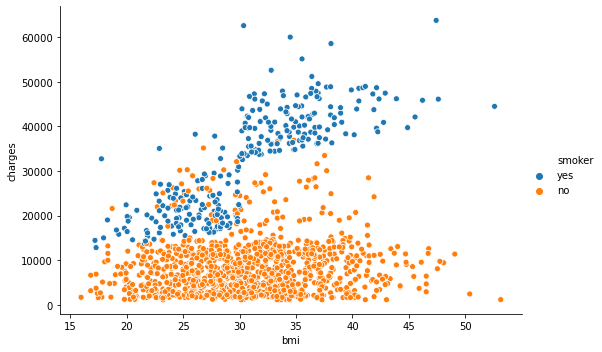

In [6]:
sns.relplot(x='bmi', y='charges', data=insurance, hue='smoker', aspect=1.5)
plt.show()

- 흡연여부: bmi의 보험료 청구 영향에 연관 -> x변수간 상호작용 고려

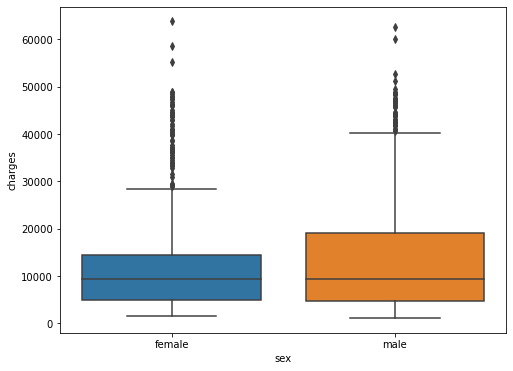

In [7]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=insurance)
plt.show()

- 남성이 윗꼬리 더 긺

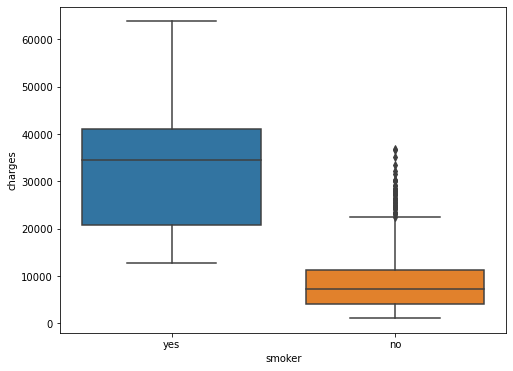

In [8]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=insurance)
plt.show()

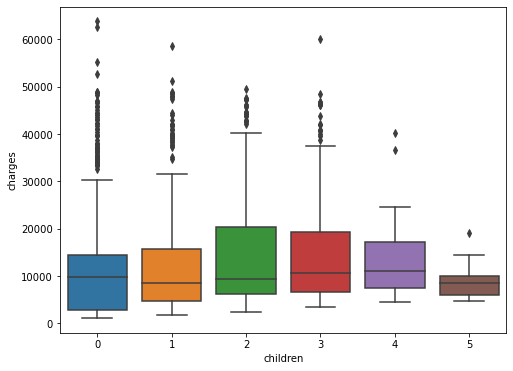

In [9]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x='children', y='charges', data=insurance)
plt.show()

- 자녀수와 연관 적어보임

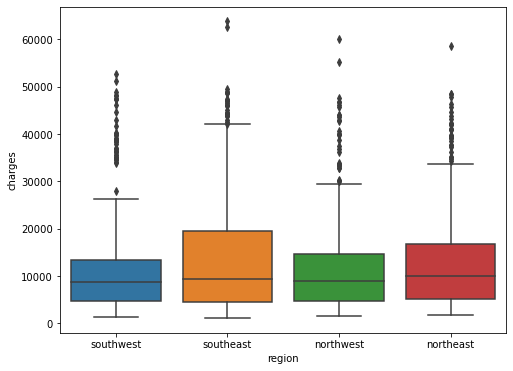

In [10]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x='region', y='charges', data=insurance)
plt.show()

- southeast 지역이 윗꼬리 긺 (특징(배경지식): 고기많이 먹는 지역)

## Trellis Plot

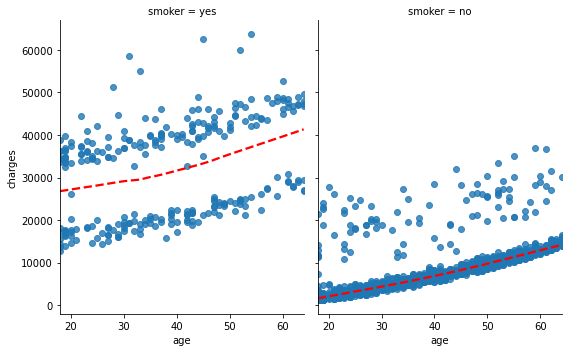

In [11]:
sns.lmplot(x='age', y='charges', data=insurance, col='smoker',
           line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, aspect=0.8)
plt.show()

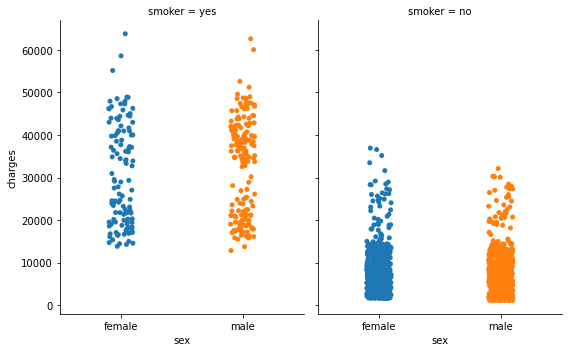

In [12]:
sns.catplot(x='sex', y='charges', data=insurance, jitter=True, col='smoker', aspect=0.8, )
plt.show()

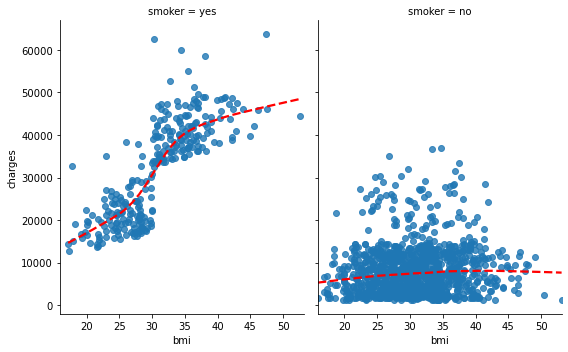

In [13]:
sns.lmplot(x='bmi', y='charges', data=insurance, col='smoker',
           line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, aspect=0.8)
plt.show()

- x변수간 상호작용 고려 필요
- smoker 안에서도 bmi별로 두덩어리로 쪼개짐

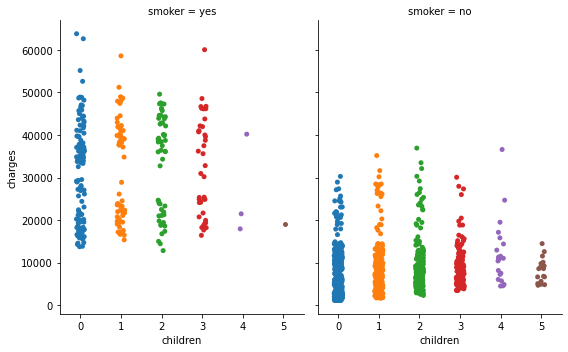

In [14]:
sns.catplot(x='children', y='charges', data=insurance, jitter=True, col='smoker', aspect=0.8, )
plt.show()

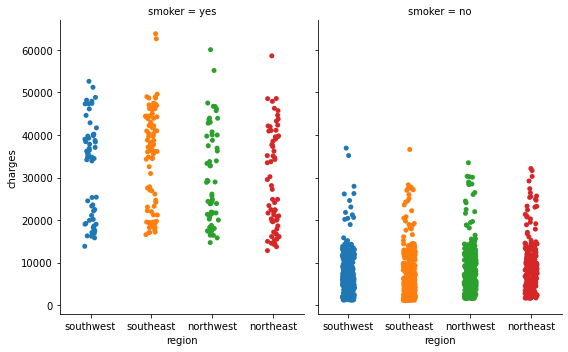

In [15]:
sns.catplot(x='region', y='charges', data=insurance, jitter=True, col='smoker', aspect=0.8)
plt.show()

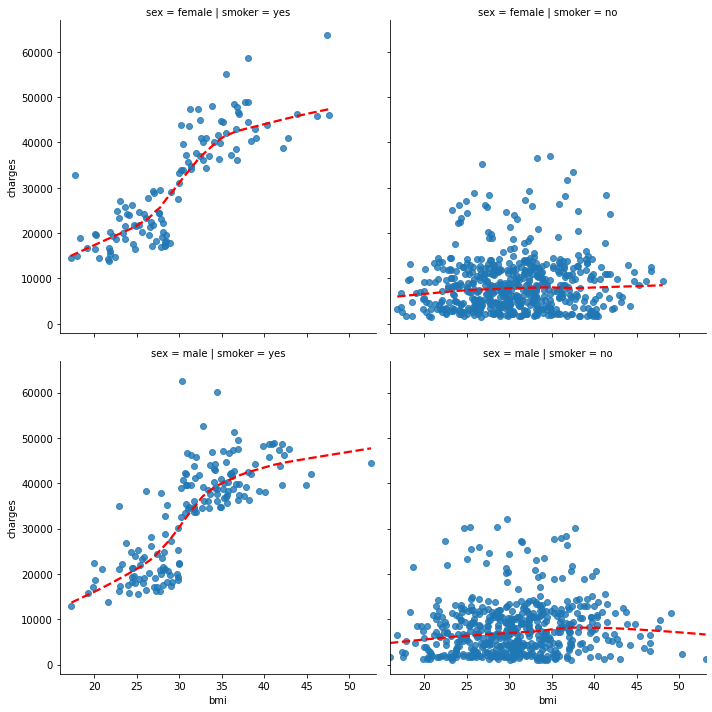

In [16]:
sns.lmplot(x='bmi', y='charges', data=insurance, row='sex', col='smoker',
           line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, ci=None)
plt.show()

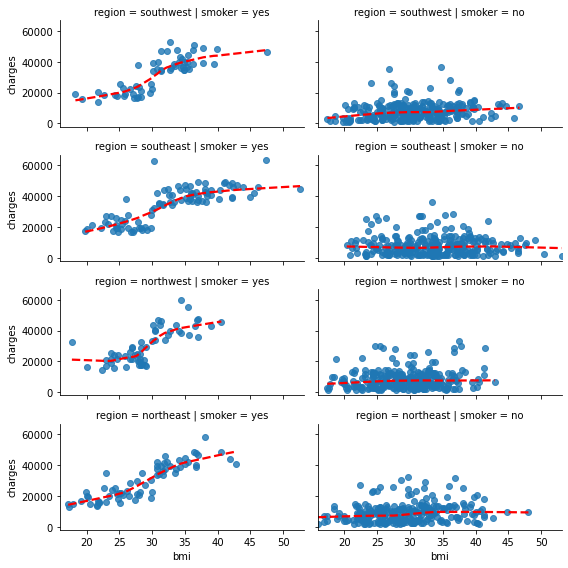

In [17]:
sns.lmplot(x='bmi', y='charges', data=insurance, row='region', col='smoker',
           line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, ci=None, height=2, aspect=2)
plt.show()

## Linear Regression

In [75]:
# interaction 포함x
model1 = smf.ols(formula='charges ~ age + sex_male + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest',
                 data=insurance_dum)
results1 = model1.fit()

In [76]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        03:03:51   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 성별, northwest지역: 유의 x

# 회귀진단
## - fitted values - residual plot (잔차검증)

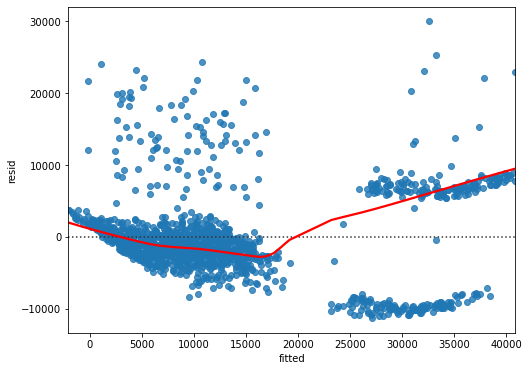

In [77]:
plt.subplots(figsize=(8, 6))
eqvar = pd.DataFrame({'fitted': results1.fittedvalues, 'resid' : results1.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)
plt.show()

- 잔차의 패턴 존재 (잔차의 등분산성x)

In [21]:
# bmi,흡연엽 상호작용 변수 추가
model2 = smf.ols(formula='charges ~ age + sex_male + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest + bmi:smoker_yes',
                 data=insurance_dum)
results2 = model2.fit()

In [22]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     780.0
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:32:33   Log-Likelihood:                -13248.
No. Observations:                1338   AIC:                         2.652e+04
Df Residuals:                    1328   BIC:                         2.657e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2223.4539    865.611     -2.569      0.010   -3921.569    -525.339
age                263.6202      9.516     27.703      0.000     244.952     282.288
sex_male          -500.1460    266.518     -1.877      0.061   -1022.987      22.695
bmi                 23.5329     25.601      0.919      0.358     -26.689      73.755
children           516.4034    110.179      4.687      0.000     300.259     732.548
smoker_yes       -2.042e+04   1648.277    -12.386      0.000   -2.36e+04   -1.72e+04
region_northwest  -585.4780    380.859     -1.537      0.124   -1332.630     161.674
region_southeast -1210.1312    382.750     -3.162      0.002   -1960.992    -459.270
region_southwest -1231.1077    382.218     -3.221      0.001   -1980.924    -481.291
bmi:smoker_yes    1443.0964     52.647     27.411      0.000    1339.816    1546.377
==============================================================================
Omnibus:                      721.596   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4465.236
Skew:                           2.529   Prob(JB):                         0.00
Kurtosis:                      10.384   Cond. No.                         663.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R^2 증가
- bmi자체, northwest 유의성x

# 회귀진단 2
## - fitted values - residual plot (잔차검증)

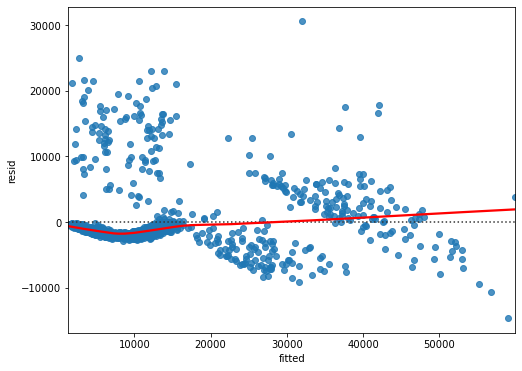

In [23]:
plt.subplots(figsize=(8, 6))
eqvar = pd.DataFrame({'fitted': results2.fittedvalues, 'resid' : results2.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)
plt.show()

- 반비례 관계, (좌) 곡선형태 관찰

## Identifying Risk Factors 1

In [24]:
insurance['resid'] = results2.resid # 잔차를 하나의 컬럼으로

### 잔차에 영향을 미치는 x변수 찾아보기

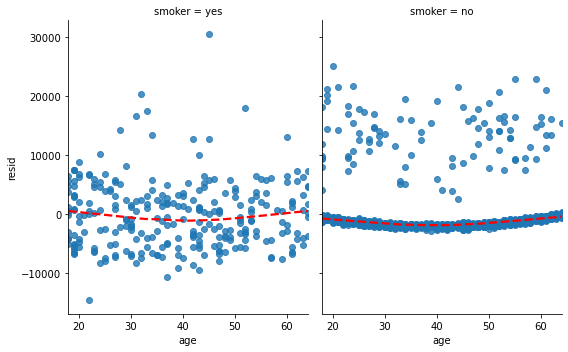

In [25]:
sns.lmplot(x='age', y='resid', data=insurance, col='smoker',
           line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, ci=None, aspect=0.8)
plt.show()

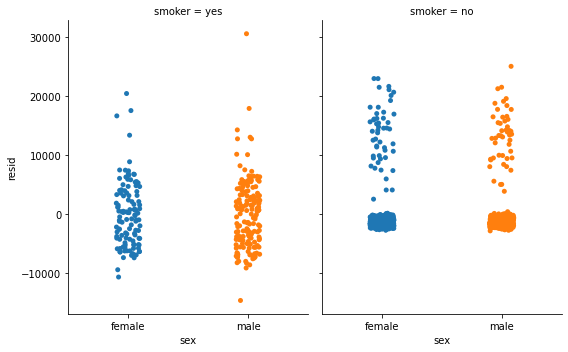

In [26]:
sns.catplot(x='sex', y='resid', data=insurance, jitter=True, col='smoker', aspect=0.8)
plt.show()

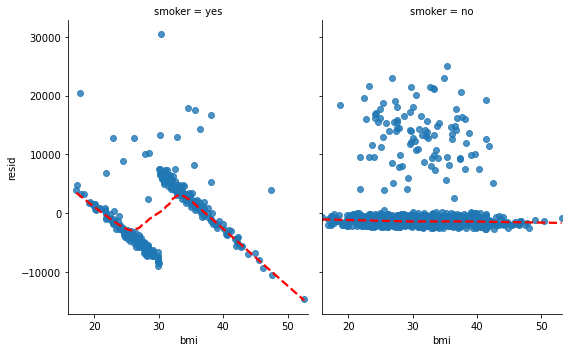

In [27]:
sns.lmplot(x='bmi', y='resid', data=insurance, col='smoker',
           line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, ci=None, aspect=0.8)
plt.show()

- 강한패턴 관찰됨!! (smoker 안에서 두 가지 그룹으로 나뉨)

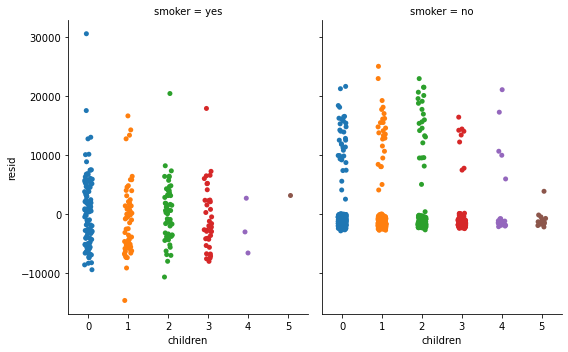

In [28]:
sns.catplot(x='children', y='resid', data=insurance, jitter=True, col='smoker', aspect=0.8)
plt.show()

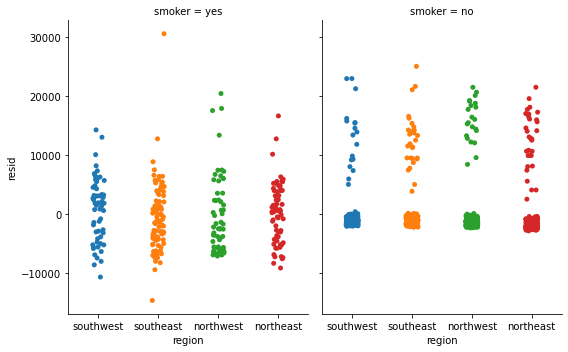

In [29]:
sns.catplot(x='region', y='resid', data=insurance, jitter=True, col='smoker', aspect=0.8)
plt.show()

In [30]:
insurance.drop(['resid'], axis=1, inplace=True) # 다시 잔차변수 drop

## Regression Tree

In [31]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor

In [32]:
X = insurance_dum.drop(['charges'], axis=1)
y = insurance_dum['charges']

In [33]:
tree = DecisionTreeRegressor(random_state=0, max_depth=2)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=0)

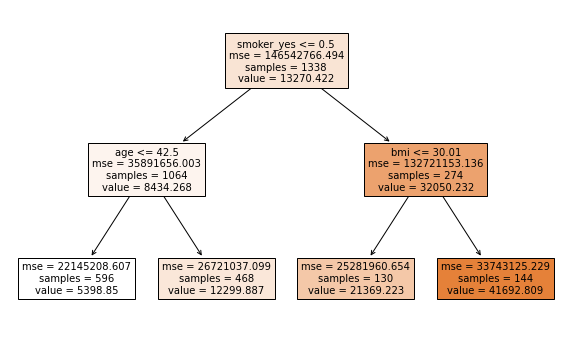

In [34]:
plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

- smoker yes <= 0.5 : 비흡연
- bmi 30 기준으로 보험료 청구 기준을 나눈 것으로 보임

## Categorizing $\text{bmi}≥30$

In [35]:
insurance['risk'] = [True if insurance.iloc[i, 2] >= 30 else False for i in range(len(insurance))]
insurance_dum['risk'] = [True if insurance_dum.iloc[i, 1] >= 30 else False for i in range(len(insurance_dum))]

In [36]:
insurance_dum = pd.get_dummies(insurance_dum, columns=['risk'], drop_first=True)

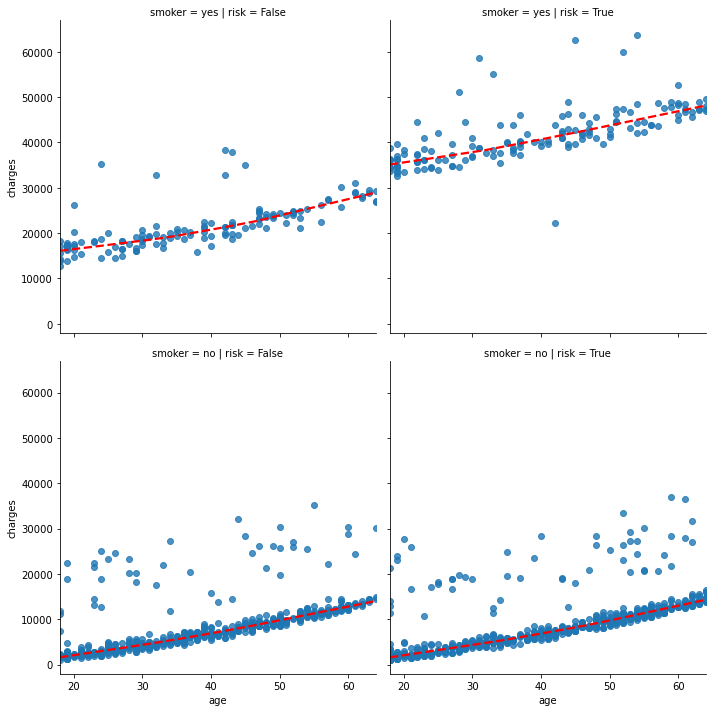

In [37]:
sns.lmplot(x='age', y='charges', data=insurance, row='smoker', col='risk',
           line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, ci=None)
plt.show()

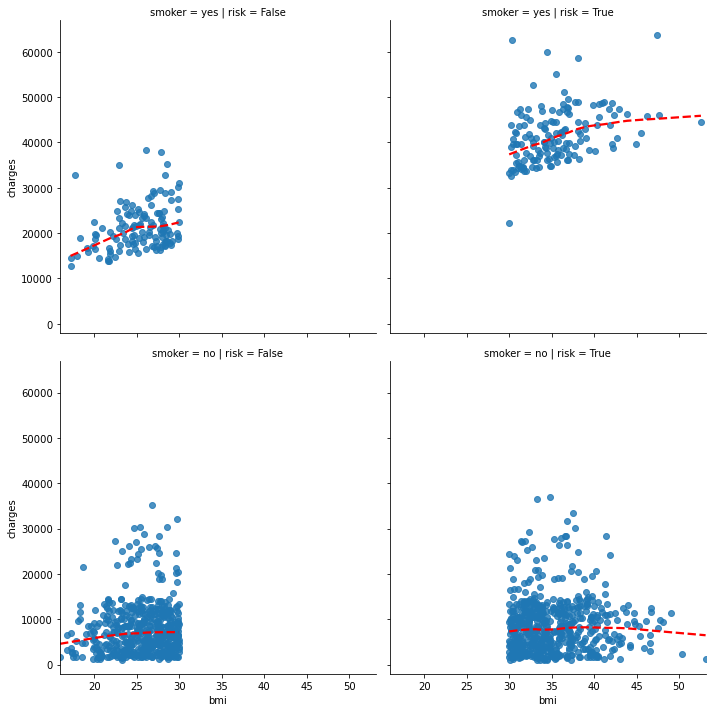

In [38]:
sns.lmplot(x='bmi', y='charges', data=insurance, row='smoker', col='risk',
           line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, ci=None)
plt.show()

In [39]:
# risk_true와 smoker_yes의 상호작용 추가, bmi값 자체는 삭제
model3 = smf.ols(formula='charges ~ age + sex_male + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest + risk_True:smoker_yes',
                 data=insurance_dum)
results3 = model3.fit()

In [40]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     933.1
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:32:41   Log-Likelihood:                -13146.
No. Observations:                1338   AIC:                         2.631e+04
Df Residuals:                    1328   BIC:                         2.636e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3590.1380    773.952     -4.639      0.000   -5108.440   -2071.836
age                    263.2373      8.815     29.861      0.000     245.944     280.531
sex_male              -493.9825    246.850     -2.001      0.046    -978.240      -9.725
bmi                     62.1796     22.778      2.730      0.006      17.495     106.864
children               520.3082    102.078      5.097      0.000     320.057     720.559
smoker_yes            1.358e+04    435.912     31.149      0.000    1.27e+04    1.44e+04
region_northwest      -278.8690    352.775     -0.791      0.429    -970.926     413.188
region_southeast      -783.8721    354.639     -2.210      0.027   -1479.586     -88.158
region_southwest     -1216.7183    354.081     -3.436      0.001   -1911.336    -522.100
risk_True:smoker_yes  1.946e+04    588.246     33.083      0.000    1.83e+04    2.06e+04
==============================================================================
Omnibus:                      867.249   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7229.464
Skew:                           3.072   Prob(JB):                         0.00
Kurtosis:                      12.588   Cond. No.                         358.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 회귀진단 3
## - fitted values - residual plot (잔차검증)

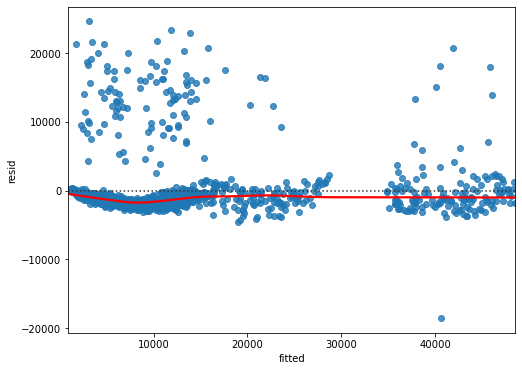

In [41]:
plt.subplots(figsize=(8, 6))
eqvar = pd.DataFrame({'fitted': results3.fittedvalues, 'resid' : results3.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)
plt.show()

- 잔차의 패턴 거의 없어짐

## Identifying Risk Factors 2

In [42]:
insurance['resid'] = results3.resid

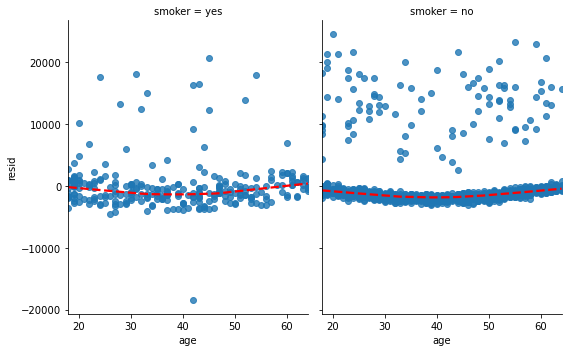

In [43]:
sns.lmplot(x='age', y='resid', data=insurance, col='smoker',
           line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, ci=None, aspect=0.8)
plt.show()

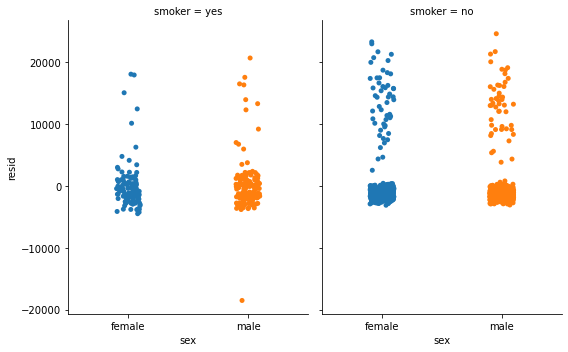

In [44]:
sns.catplot(x='sex', y='resid', data=insurance, jitter=True, col='smoker', aspect=0.8)
plt.show()

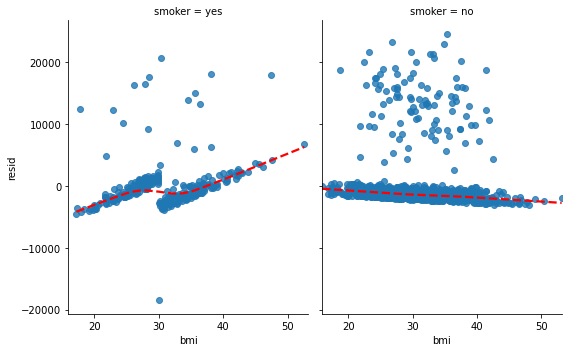

In [45]:
sns.lmplot(x='bmi', y='resid', data=insurance, col='smoker',
           line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, ci=None, aspect=0.8)
plt.show()

- 여전히 bmi 30 기준으로 bmi값 자체가 영향 미침을 알 수 있음

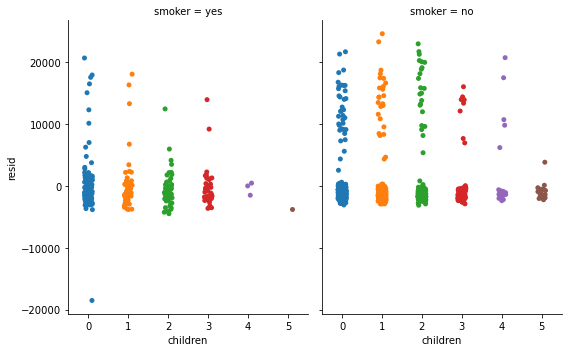

In [46]:
sns.catplot(x='children', y='resid', data=insurance, jitter=True, col='smoker', aspect=0.8)
plt.show()

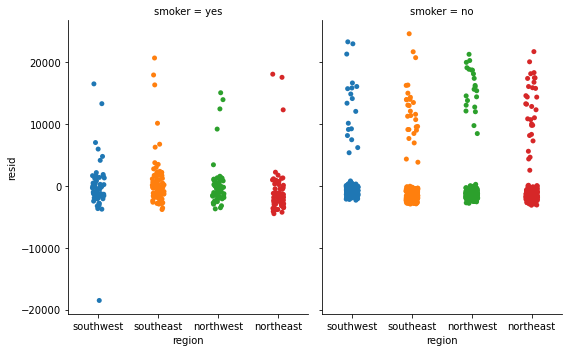

In [47]:
sns.catplot(x='region', y='resid', data=insurance, jitter=True, col='smoker', aspect=0.8)
plt.show()

In [48]:
insurance.drop(['resid'], axis=1, inplace=True)

In [49]:
# bmi 값, smoker_yes 의 상호작용 + bmi 값 자체 추가 
model4 = smf.ols(formula='charges ~ age + sex_male + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest + risk_True:smoker_yes + bmi:smoker_yes',
                 data=insurance_dum)
results4 = model4.fit()

In [50]:
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     870.6
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:32:44   Log-Likelihood:                -13124.
No. Observations:                1338   AIC:                         2.627e+04
Df Residuals:                    1327   BIC:                         2.633e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2233.7692    789.579     -2.829      0.005   -3782.728    -684.811
age                    264.0479      8.680     30.420      0.000     247.020     281.076
sex_male              -534.7190    243.116     -2.199      0.028   -1011.654     -57.784
bmi                     19.4638     23.353      0.833      0.405     -26.349      65.277
children               523.7463    100.503      5.211      0.000     326.585     720.907
smoker_yes             865.0691   1985.838      0.436      0.663   -3030.654    4760.792
region_northwest      -375.7760    347.641     -1.081      0.280   -1057.762     306.210
region_southeast      -902.8165    349.633     -2.582      0.010   -1588.710    -216.923
region_southwest     -1248.9757    348.647     -3.582      0.000   -1932.934    -565.017
risk_True:smoker_yes  1.488e+04    907.253     16.404      0.000    1.31e+04    1.67e+04
bmi:smoker_yes         493.2517     75.227      6.557      0.000     345.674     640.829
==============================================================================
Omnibus:                      909.945   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8226.407
Skew:                           3.244   Prob(JB):                         0.00
Kurtosis:                      13.269   Cond. No.                         897.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

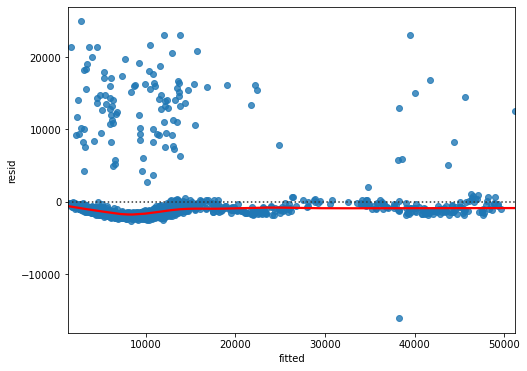

In [51]:
plt.subplots(figsize=(8, 6))
eqvar = pd.DataFrame({'fitted': results4.fittedvalues, 'resid' : results4.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)
plt.show()

## Identifying Risk Factors 3

In [52]:
insurance['resid'] = results4.resid

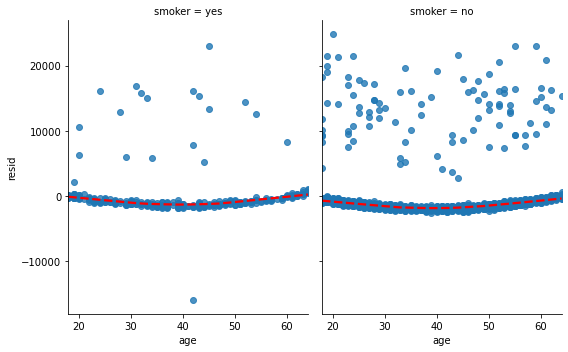

In [53]:
sns.lmplot(x='age', y='resid', data=insurance, col='smoker',
           line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, ci=None, aspect=0.8)
plt.show()

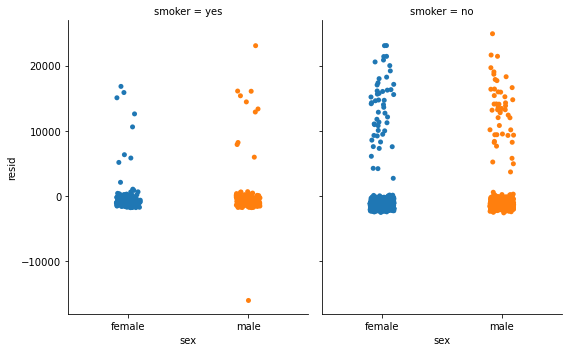

In [54]:
sns.catplot(x='sex', y='resid', data=insurance, jitter=True, col='smoker', aspect=0.8)
plt.show()

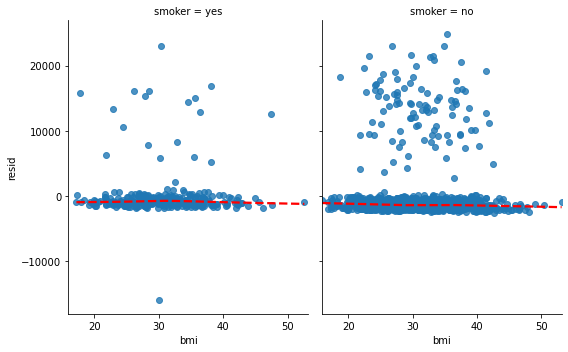

In [55]:
sns.lmplot(x='bmi', y='resid', data=insurance, col='smoker',
           line_kws={'color':'red', 'linestyle':'dashed'}, lowess=True, ci=None, aspect=0.8)
plt.show()

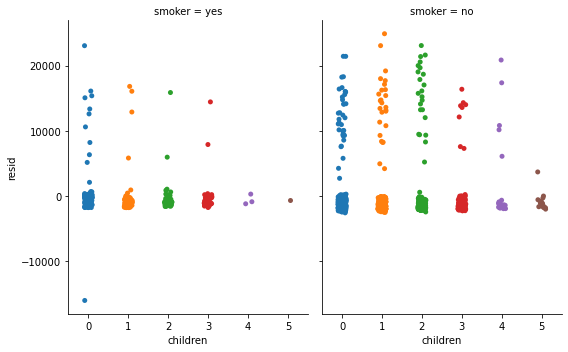

In [56]:
sns.catplot(x='children', y='resid', data=insurance, jitter=True, col='smoker', aspect=0.8)
plt.show()

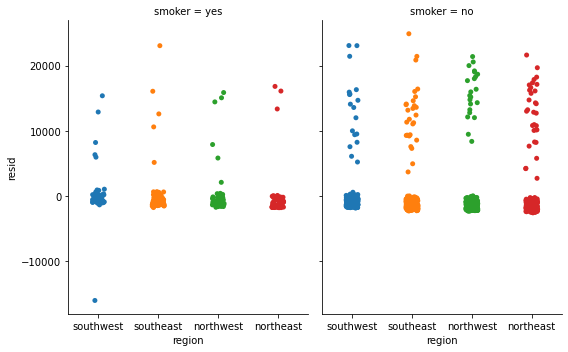

In [57]:
sns.catplot(x='region', y='resid', data=insurance, jitter=True, col='smoker', aspect=0.8)
plt.show()

In [58]:
insurance.drop(['resid'], axis=1, inplace=True)

In [59]:
X = insurance_dum.drop(['charges'], axis=1)
y = insurance_dum['charges']

In [60]:
X['risk_True:smoker_yes'] = X['risk_True']*X['smoker_yes']
X['bmi:smoker_yes'] = X['bmi']*X['smoker_yes']

In [61]:
import feature_selection as fsel
fsel.forwardSelection(X, y, model_type='linear', elimination_criteria='aic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Entered : bmi:smoker_yes 	AIC : 27283.338948231532
Entered : age 	AIC : 26716.48622741126
Entered : risk_True:smoker_yes 	AIC : 26302.48083159561
Entered : children 	AIC : 26278.546101158914
Entered : region_southwest 	AIC : 26272.44277908895
Entered : region_southeast 	AIC : 26269.280412828986
Entered : sex_male 	AIC : 26266.480255681436
Break : Significance Level
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1244.
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:32:48   Log-Likelihood:                -13125.
No. Observations:                1338   AIC:                         2.627e+04
Df Residuals

['intercept',
 'bmi:smoker_yes',
 'age',
 'risk_True:smoker_yes',
 'children',
 'region_southwest',
 'region_southeast',
 'sex_male']

## Model Comparison

## Training and Test Data

In [62]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(insurance_dum, test_size=0.4, random_state=0)
print('train:', len(train), '| test:', len(test))

train: 802 | test: 536


## Regression

In [63]:
model4 = smf.ols(formula='charges ~ age + sex_male + children + region_southeast + region_southwest + risk_True:smoker_yes + bmi:smoker_yes',
                 data=train)
results4 = model4.fit()

In [64]:
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     616.7
Date:                Sat, 27 Mar 2021   Prob (F-statistic):          5.81e-316
Time:                        18:32:49   Log-Likelihood:                -7915.9
No. Observations:                 802   AIC:                         1.585e+04
Df Residuals:                     794   BIC:                         1.589e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1997.1079    583.111     -3.425      0.001   -3141.730    -852.486
age                    269.0135     11.920     22.568      0.000     245.615     292.412
sex_male              -305.5108    333.801     -0.915      0.360    -960.747     349.726
children               530.0424    137.989      3.841      0.000     259.177     800.908
region_southeast      -862.4677    405.501     -2.127      0.034   -1658.449     -66.487
region_southwest      -982.8535    407.070     -2.414      0.016   -1781.914    -183.793
risk_True:smoker_yes  1.507e+04    883.632     17.049      0.000    1.33e+04    1.68e+04
bmi:smoker_yes         524.2330     20.789     25.217      0.000     483.425     565.041
==============================================================================
Omnibus:                      538.889   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4198.558
Skew:                           3.177   Prob(JB):                         0.00
Kurtosis:                      12.235   Cond. No.                         228.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

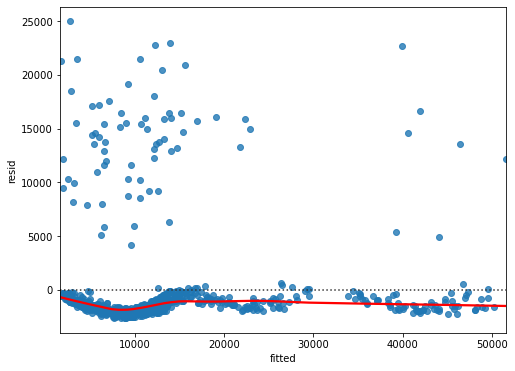

In [65]:
plt.subplots(figsize=(8, 6))
eqvar = pd.DataFrame({'fitted': results4.fittedvalues, 'resid' : results4.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)
plt.show()

- 곡선: 연령의 영향일 것으로 추정

## Random Forest

In [66]:
X_train = train.drop(['charges'], axis=1)
y_train = train['charges']
X_test = test.drop(['charges'], axis=1)
y_test = test['charges']

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

## Predicted Values

In [68]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
pred1 = results4.predict(X_test)
pred2 = rf.predict(X_test)

## Predictive $R^2$

In [69]:
r2(y_test, pred1)

0.8977571975825718

In [70]:
r2(y_test, pred2)

0.8695583822787472

## MAE

In [71]:
mae(y_test, pred1)

2318.8470626857156

In [72]:
mae(y_test, pred2)

2652.205018315393

## MAPE

In [73]:
mape(y_test, pred1)

0.27372051571462747

In [74]:
mape(y_test, pred2)

0.35669852580761807